# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience</a>
## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<!-- <b><font color="blue">Легкая часть</font></b> (достаточно на "хор"): -->
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов
* Задача 3 &mdash; 20 баллов








-----

In [ ]:
# Bot check

# HW_ID: phds_hw3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from typing import List, Callable, Tuple

import seaborn as sns
sns.set_theme('notebook', font_scale=1.2, palette='Set2')

from tqdm.notebook import tqdm

## Задача 1

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернуллиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

При добавлении регуляризации к модели логистической регрессии оптимизируемый функционал принимает вид

$$
    F(\theta) = -\sum_{i=1}^n \left[Y_i \log{\sigma(\theta^T x_i)} + (1 - Y_i) \log{\left(1 - \sigma(\theta^T x_i)\right)}\right] + \lambda\theta^T \theta
$$

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

**Решение**

1.


Формула градиентного спуска (GD):

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta F(\theta_t)
$$


Рассчитаем градиент по параметру $\theta$:

$$
\nabla_\theta F(\theta) =  \frac{\partial F(\theta)}{\partial \theta} = -\sum_{i=1}^n \left[ Y_i \frac{\partial \log{\sigma(\theta^T x_i)}}{\partial \theta} + (1 - Y_i) \frac{\partial \log{\left(1 - \sigma(\theta^T x_i)\right)}}{\partial \theta} \right] + 2 \lambda \theta \\
= -\sum_{i=1}^n \left[ Y_i (1 - \sigma(\theta^T x_i)) x_i - (1 - Y_i) \sigma(\theta^T x_i) x_i \right] + 2 \lambda \theta \\
= -\sum_{i=1}^n \left[ Y_i x_i - Y_i \sigma(\theta^T x_i) x_i - \sigma(\theta^T x_i) x_i + Y_i \sigma(\theta^T x_i) x_i \right] + 2 \lambda \theta \\
= -\sum_{i=1}^n \left[ Y_i - \sigma(\theta^T x_i) \right] x_i + 2 \lambda \theta
$$

Подставим в формулу:

$$
\theta_{t+1} = \theta_t + \eta \sum_{i=1}^n \left[ Y_i - \sigma(\theta_t^T x_i) \right] x_i  - 2 \eta \lambda \theta_t
$$

Формула стохастического градиентного спуска (SGD):

$$
\theta_{t+1} = \theta_t - \eta /n \nabla_\theta F_i(\theta_t)
$$

Снова подставим градиент:

$$
\theta_{t+1} = \theta_t + \eta /n \left[ Y_i - \sigma(\theta^T x_i) \right] x_i - 2 \eta \lambda \theta_t
$$

2.

Чтобы показать, что $F(\theta)$ выпуклая, необходимо показать, что гессиан (матрица вторых производных) функционала положительно определена. Найдем гессиан:

Сначала найдем вторую производную (матрицу Гессе) по $\theta$:

$$
\frac{\partial^2 F(\theta)}{\partial \theta^2} = \frac{\partial}{\partial \theta} \nabla_\theta F(\theta) = \frac{\partial}{\partial \theta} \left( -\sum_{i=1}^n \left[ Y_i - \sigma(\theta^T x_i) \right] x_i + 2 \lambda \theta \right)
$$

$$
\frac{\partial^2 F(\theta)}{\partial \theta^2} =  -\sum_{i=1}^n  \frac{\partial}{\partial \theta} \left( \left[ Y_i - \sigma(\theta^T x_i) \right] x_i \right) + 2 \lambda I
$$

$$
\frac{\partial^2 F(\theta)}{\partial \theta^2} =  -\sum_{i=1}^n  \frac{\partial}{\partial \theta}  \left(  Y_i x_i  -  \sigma(\theta^T x_i) x_i \right)  + 2 \lambda I
$$

$$
\frac{\partial^2 F(\theta)}{\partial \theta^2} =  -\sum_{i=1}^n  \left( 0  - \frac{\partial \sigma(\theta^T x_i)}{\partial \theta}  x_i  \right)  + 2 \lambda I
$$

$$
\frac{\partial^2 F(\theta)}{\partial \theta^2} = \sum_{i=1}^n \sigma(\theta^T x_i) (1 - \sigma(\theta^T x_i)) x_i x_i^T + 2 \lambda I
$$

Обозначим $w_i = \sigma(\theta^T x_i) (1 - \sigma(\theta^T x_i)) > 0$.

Гессиан:

$$
H = \frac{\partial^2 F(\theta)}{\partial \theta^2} = \sum_{i=1}^n w_i x_i x_i^T + 2 \lambda I
$$

Проверим на положительность:

Доказать, что
$$
z^T H z > 0
$$
Рассмотрим
$$
z^T H z = z^T \left( \sum_{i=1}^n w_i x_i x_i^T + 2 \lambda I \right) z = \\
\sum_{i=1}^n w_i z^T x_i x_i^T z + 2 \lambda z^T z = \\
\sum_{i=1}^n w_i (x_i^T z)^2 + 2 \lambda ||z||^2 >0
$$

Гессиан положительный, следовательно, $F(\theta)$ - выпуклая функция, имеющая единственный глобальный минимум.

3.

При отсутствии регуляризации ($\lambda = 0$) модель может найти такие параметры, при которых предсказания могут быть почти идеальные. Тогда градиент будет стремиться к бесконечности, что будет приводить к слишком большому росту коэффициентов. А при этом при регуляризации, модель не будет слишком сильно менять (увеличивать) коэффициенты.



## Задача 2

### Введение

Вы когда-нибудь задумывались, что такое запах и вкус? Как именно мы различаем запахи? Ведь это даже не физическая величина: наш нос не измеряет концентрацию примесей в воздухе, их парциальное давление или что-то ещё. Запах &mdash; есть субъективная реакция мозга на химическое взаимодействие молекул с рецепторами в слизистой оболочке носа.

Рассмотрим, на первый взгляд, забавное устройство  &mdash; [электронный нос](https://en.wikipedia.org/wiki/Electronic_nose) (*e-nose*). Этот "прибор", буквально, повторяет принцип работы человеческого носа и состоит из трёх основных компонентов:
1.  Массив датчиков, чувствительных к наличию различных примесей в газе
2.  Канал доставки, по которому газ поступает к датчикам
3.  Система обработки данных, анализирующая сигналы от датчиков и сопоставляющая их с известными шаблонами. Если запах уже "знаком" системе, она может его распознать

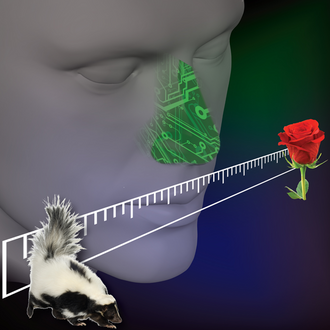

*Картинка из Википедии*


Спектр возможных применений подобных устройств может быть весьма широк: от контроля качества скоропортящихся продуктов до обнаружения взрывчатых веществ, вирусов, бактерий или токсичных газов.

Сами сенсоры бывают разными. Наиболее современные разработки основаны на технологиях с применением графена и углеродных нанотрубок. Более доступной, но достаточно эффективной альтернативой являются полупроводниковые сенсоры на основе оксидов металлов. Их принцип работы основан на изменении проводимости при адсорбции молекул газа на поверхности датчика. Измеряя сопротивление таких сенсоров, можно определить состав и даже концентрацию примесей в воздухе.

### Проблема
Одной из самых сложных проблем в этой области считается дрейф сигнала датчиков. Он возникает из-за физико-химического воздействия окружающей среды: со временем на сенсоры оседают посторонние молекулы, изменяя структуру и свойства материала. Системе обработки становится всё сложнее анализировать данные, поскольку она откалибрована (обучена) на свежих сенсорах, без учёта дрейфа. Это, очевидно, приводит к постепенному ухудшению точности измерений.

Для изучения этого явления был проведён долгосрочный эксперимент, в ходе которого на протяжении трёх лет фиксировались "отпечатки запахов" шести летучих органических соединений при различных концентрациях: *аммиака, ацетальдегида, ацетона, этилена, этанола и толуола*. Подробное описание методики, сбора данных и выделения признаков можно найти в [оригинальной статье](https://sci-hub.ru/10.1016/j.snb.2012.01.074), а также на странице с [данными](https://archive.ics.uci.edu/dataset/270/gas+sensor+array+drift+dataset+at+different+concentrations). Авторы исследования разработали и показали эффективность нового (на момент выхода статьи) способа учёта дрейфа в классификаторах газов.

### [Данные](https://archive.ics.uci.edu/dataset/270/gas+sensor+array+drift+dataset+at+different+concentrations)
Исследуемый "нос" состоял из 16 сенсоров. Для каждого сенсора снималась зависимость изменения сопротивления от времени.
1.   **Максимальное изменение сопротивления** в ходе одного измерения (абсолютное и относительное) &mdash; 2 признака
2.   **Максимум/минимум экспоненциального скользящего среднего** (EMA) при разных параметрах сглаживания &mdash; 6 признаков

<details>
  <summary> Подробнее ✍️ </summary>
  
> Для последовательности временных отсчётов $r_1$, $r_2$, $r_3$... *экспоненциальное скользящее среднее* рассчитывается как
> $$
    y_k = (1 - \alpha)y_{k-1} + \alpha(r_k - r_{k-1}),
> $$
> Параметр $\alpha \in (0, 1)$  определяет степень "забывания" старых значений: чем он меньше, тем сильнее сглаживается сигнал. В нашем случае EMA рассчитывалось отдельно для возрастающего и убывающего участков сигнала при $\alpha = 10^{-1}, 10^{-2}, 10^{-3}$. В качестве признаков взяты, соответственно, максимальное и минимальное значения за время измерения. Подробнее см. в статье.

</details><br/>

Итого, имеется $8 \cdot 16 = 128$ признаков

### 1. Загрузка и подготовка данных

#### 1.1 Смотрим на данные
Скачайте датасет. Если открыть любой файл в текстовом редакторе, вы увидите, что данные хранятся в разреженном формате `svmlight`. Для его загрузки в `sklearn` предусмотрена специальная функция. Воспользуйтесь ей:

In [ ]:
from sklearn.datasets import load_svmlight_files

file_paths = [f'batch{n}.dat' for n in range(1, 11)]

data = load_svmlight_files(file_paths)

type(data), len(data), type(data[0]), type(data[1])

(list, 20, scipy.sparse._csr.csr_matrix, numpy.ndarray)

Вы получили список из 20 элементов, в котором чередуются матрицы признаков и векторы таргета. Матрицы признаков имеют тип разреженной матрицы. Преобразуем их в  `pandas.DataFrame` и присвоим осмысленные имена столбцам:

In [ ]:
# Формируем список имён признаков
feature_names = [
    f"{sensor}_{suffix}"
    for sensor in range(1, 17)
    for suffix in ["dR", "norm_dR"] +
                  [f"max_ema_{alpha}" for alpha in [0.1, 0.01, 0.001]] +
                  [f"min_ema_{alpha}" for alpha in [0.1, 0.01, 0.001]]
]

# Разделяем данные: X (признаки) и y (таргет)
X_raw, y_list = data[::2], data[1::2]

# Преобразуем разреженные матрицы в DataFrame
X_list = [pd.DataFrame(X.toarray(), columns=feature_names) for X in X_raw]

X_list[0].head()

,1_dR,1_norm_dR,1_max_ema_0.1,1_max_ema_0.01,1_max_ema_0.001,1_min_ema_0.1,1_min_ema_0.01,1_min_ema_0.001,2_dR,2_norm_dR,...,15_min_ema_0.01,15_min_ema_0.001,16_dR,16_norm_dR,16_max_ema_0.1,16_max_ema_0.01,16_max_ema_0.001,16_min_ema_0.1,16_min_ema_0.01,16_min_ema_0.001
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


>*Замечание.* Первое число в названии означает номер сенсора.

**Почему данные представлены в таком виде?** Согласно описанию эксперимента, количество измерений для разных газов варьировалось от месяца к месяцу. В некоторые периоды отдельные газы вовсе не использовались. Чтобы сбалансировать распределение классов, данные сгруппировали в 10 батчей, где разные газы представлены более равномерно.

Проверим, насколько хорошо это удалось: напишите функцию, которая визуализирует распределение классов в каждом батче, и примените её к данным.
<details>
  <summary> Подсказка ✍️ </summary>
  
> Удобно воспользоваться одной из функций: `sns.countplot`, `sns.barplot`, `plt.bar`

</details><br/>


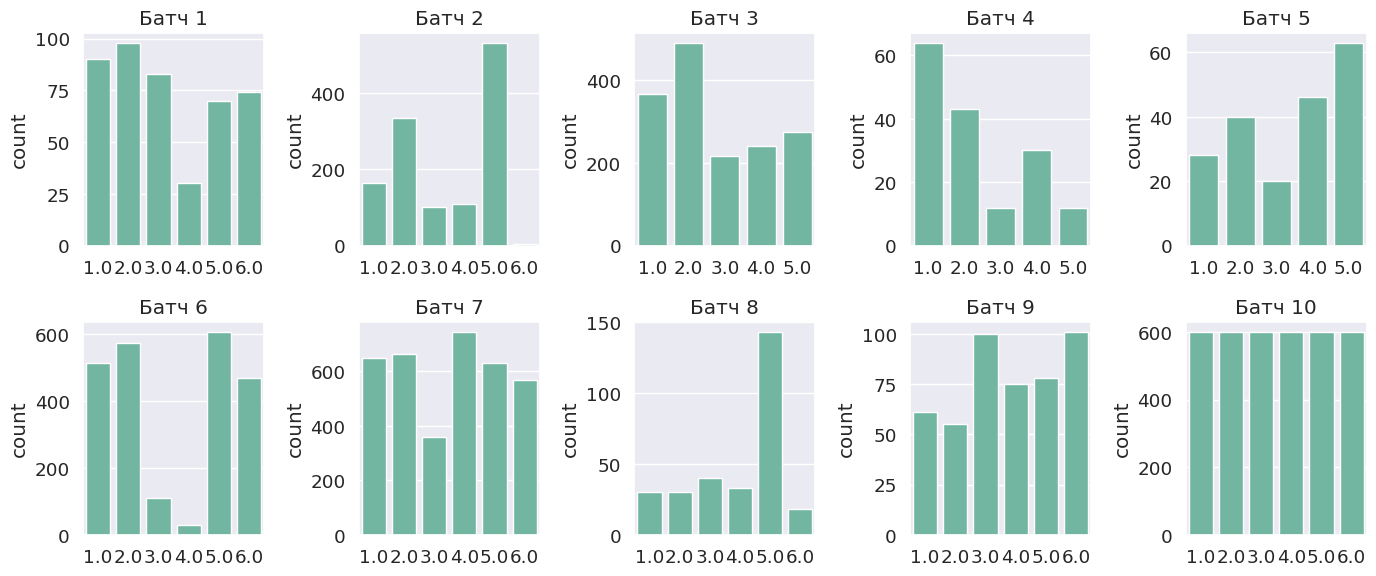

In [ ]:
def visualize_classes(target_batches: List[np.ndarray]):
    """Визуализирует распределение классов во всех батчах

    Args:
        target_batches (List[np.ndarray]): список таргетов
    """

    plt.figure(figsize=(14, 6))

    for i, y in enumerate(target_batches):
        plt.subplot(2, 5, i + 1)
        sns.countplot(x=y)
        plt.title(f'Батч {i + 1}')
    plt.tight_layout()
    plt.show()


visualize_classes(y_list)


**Вывод:**

Выведите количество экспериментов в каждом из батчей.

In [ ]:
for i, y in enumerate(y_list):
    print(len(y))

445
1244
1586
161
197
2300
3613
294
470
3600


**Вывод:** хотя и есть хорошие пакеты (9, 10...), все же присутствует неравномерное распределение классов по батчам, и размеры батчей различаются

#### 1.2 Учитываем время
Поскольку объекты нашей выборки упорядочены по времени, имеет смысл добавить признак `experiment_id`, описывающий номер эксперимента. Причём, нумерация должна быть сквозной: если последний эксперимент 1-го батча имеет номер $N$, то первый эксперимент второго батча должен иметь номер $N + 1$. Создайте этот столбец и поместите его в начало каждой таблицы с признаками:

In [ ]:
X_dense = [X.toarray() for X in X_raw]
X_list = [pd.DataFrame(X, columns=feature_names) for X in X_dense]

n = 0

for i, X in enumerate(X_list):
    n_samples = X.shape[0]
    id = np.arange(n, n + n_samples)
    X.insert(0, 'experiment_id', id)
    n += n_samples

Проверьте, всё ли правильно вы сделали:

In [ ]:
# Создаем списки для первой и последней строки таблицы
first_ids = [batch['experiment_id'].iloc[0] for batch in X_list]
last_ids = [batch['experiment_id'].iloc[-1] for batch in X_list]

# Создаем DataFrame для отображения
result = pd.DataFrame(
    [first_ids, last_ids],
    index=['First experiment_id', 'Last experiment_id'],
    columns=[f'batch {i+1}' for i in range(len(X_list))]
)

result

,batch 1,batch 2,batch 3,batch 4,batch 5,batch 6,batch 7,batch 8,batch 9,batch 10
First experiment_id,0,445,1689,3275,3436,3633,5933,9546,9840,10310
Last experiment_id,444,1688,3274,3435,3632,5932,9545,9839,10309,13909


#### 1.3 Определяемя с таргетом
Задачу многоклассовой классификации решать сложно. Но можно свести её к бинарному случаю. Для этого выберите один газ и обозначьте его как класс 1. Все остальные газы отнесите к классу 0.
> 📌 *Замечание.* Вместо 0 и 1 можете придумать более понятные названия.

In [ ]:
gas_id = 1

y_list_1 = [(y == gas_id).astype(int) for y in y_list]
y_list_1[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Такая стратегия имеет название "One-VS-All". При помощи написанной вами ранее функции выведите распределение новых классов по батчам:

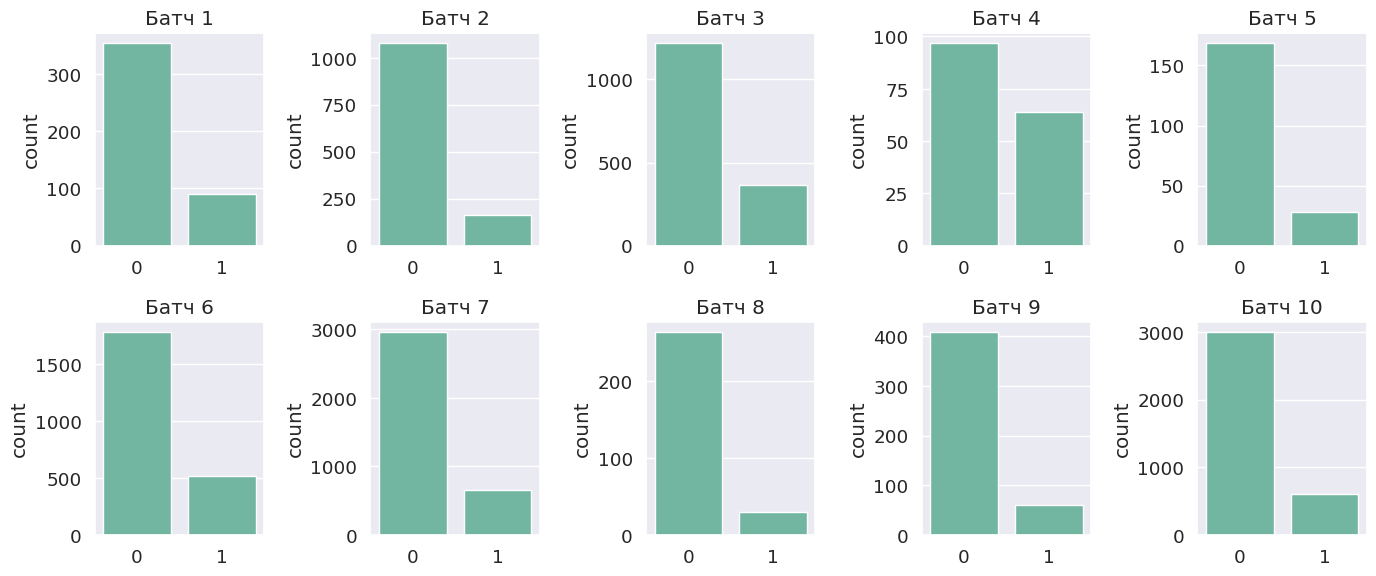

In [ ]:
visualize_classes(y_list_1)

Далее, при построении классификатора, учитывайте диcбаланс: используйте взвешенную версию логистической регрессии (см. параметр class_weight) и метрику balanced_accuracy_score для оценки качества модели. **❗Это очень важно❗**

#### 1.4 Что собираемся делать?

Основное назначение этого датасета &mdash; разработка алгорима машинного обучения, способного учиывать дрейф датчиков. Авторы исследования  предложили решение, основанное на построении взвешенного ансамбля линейных классификаторов.

Мы же пока сосредоточимся на более простых вещах. В качестве **обучающей выборки** будем использовать **первый батч**, и посмотрим, как будет деградировать точность логистической регрессии с течением времени. Выделите обучающий батч и список тестовых батчей.

In [ ]:
X_train = X_list[0]
y_train = y_list_1[0]

X_test = X_list[1:]
y_test = y_list_1[1:]
X_test

#### 1.5 Стандартизация
Обучите `StandardScaler` на обучающем батче и преобразуйте его. Преобразуйте тестовые батчи.

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = [scaler.transform(X_t) for X_t in X_test]
X_test_scaled[0]

array([[ 1.73594744e+00, -6.72879561e-01, -7.12364679e-01, ...,
         9.95998189e-01,  9.64242326e-01,  8.99812923e-01],
       [ 1.74373196e+00, -5.27151118e-01, -2.80792558e-01, ...,
         8.36636267e-01,  8.31463693e-01,  7.95242642e-01],
       [ 1.75151648e+00, -3.68197674e-01,  2.21150698e-01, ...,
         6.95371817e-01,  6.93059025e-01,  4.92731402e-01],
       ...,
       [ 1.13965339e+01,  1.86747909e-01, -4.86022672e-01, ...,
         3.65669698e-02,  1.59591305e-01, -1.39898129e-01],
       [ 1.14043184e+01,  1.88484927e-01, -4.86336210e-01, ...,
         5.71015808e-03,  1.34647879e-01, -2.43904802e-01],
       [ 1.14121029e+01,  1.90650752e-01, -4.85771391e-01, ...,
         3.64045720e-02,  1.74862411e-01, -2.20198578e-01]])

### 2. Есть ли мультиколлинеарность?

Хорошо ли обусловлена обучающая матрица признаков? О чём это говорит?

In [ ]:
cond_number = np.linalg.cond(X_train)
print(f"Число обусловленности: {cond_number}")

Число обусловленности: 118759179.82250029


**Вывод:** число обусловленности очень большое, матрица признаков плохо обусловлена. Это говорит о высокой мультиколлинеарности и наличии коррелирующих признаков

Для наглядности, выведите матрицу корреляций. Что означают элементы матрицы? А в нашем случае?

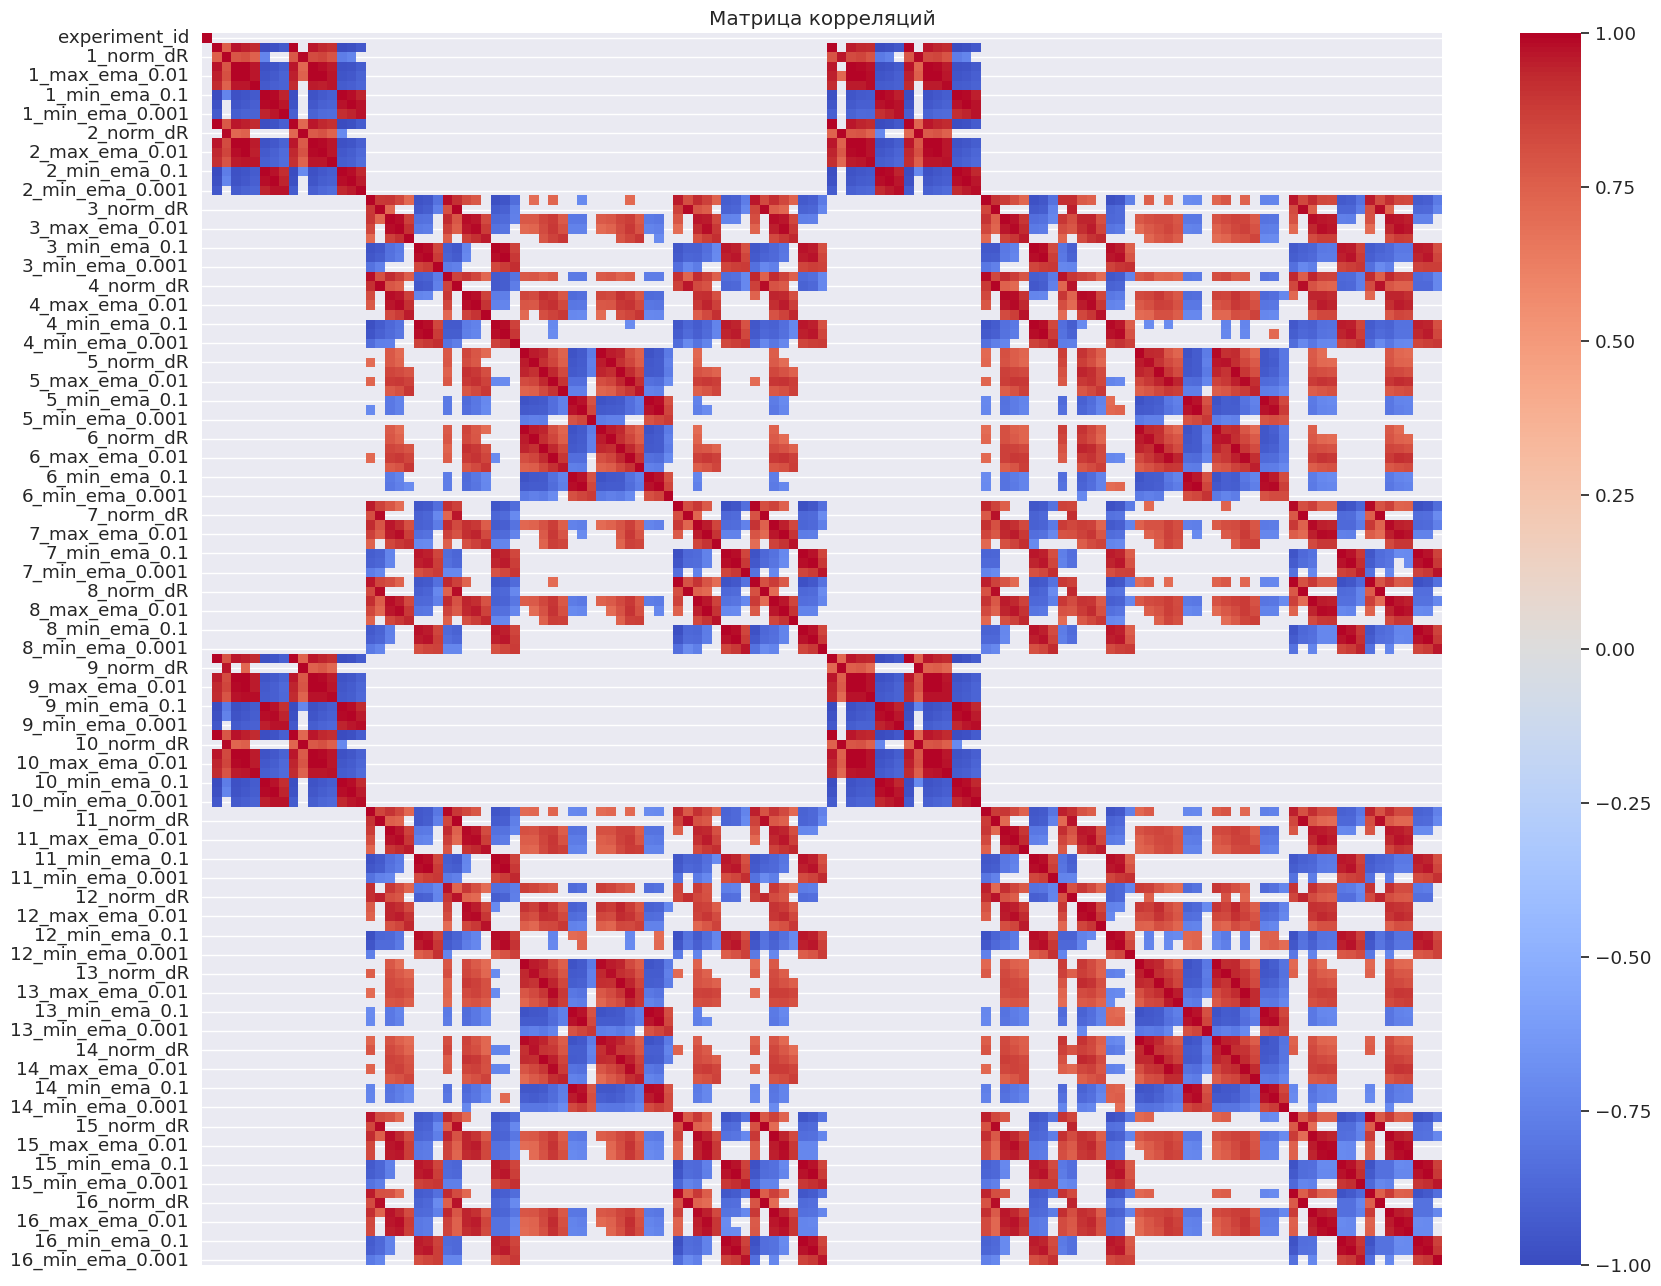

In [ ]:
corr_matrix = X_train.corr()

plt.figure(figsize=(20, 16))
mask = np.abs(corr_matrix) < 0.7
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, mask=mask, xticklabels=False)
plt.title("Матрица корреляций")
plt.show()

**Ответ:** элементы матрицы - корреляция между признаками по батчам, здесь скрыты невысокие корреляции однако видно, что осталось много нескрытых клеток. Это подтверждает предположение о высокой мультиколлинеарности

### 3. Модельки, модельки, модельки...

#### 3.1 Самый популярный класс
Найдите самый популярный класс в обучающем батче и посчитайте точность ответа на тестовых данных только этим классом — константой. Отличается ли взвешенная точность от обычной?

In [ ]:
y_train_series = pd.Series(y_train)
most_common_class = y_train_series.value_counts().idxmax()
print(f"Самый популярный класс: {most_common_class}")

y_pred_constant = [most_common_class] * len(y_test[0])
print(len(y_pred_constant))

accuracy = accuracy_score(y_test[0], y_pred_constant)
print(f"Обычная точность: {accuracy:.4f}")

balanced_accuracy = balanced_accuracy_score(y_test[0], y_pred_constant)
print(f"Взвешенная точность: {balanced_accuracy:.4f}")

Самый популярный класс: 0
1244
Обычная точность: 0.8682
Взвешенная точность: 0.5000


**Вывод:**

#### 3.2 Модель логистической регрессии без регуляризации

Реализуем функции для обучения, тестирования и отображения деградации метрики качества ответов модели со временем (заполните пропуски):

In [ ]:
def visualize_metric_fall(scores: List[float]):
    """Визуализирует метрику на обучающем и тестовых батчах с пострением
    прямой характерного спада

    Args:
        scores (List[float]): значения метрики для различных батчей
    """

    n = np.arange(len(scores) - 1)

    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(n.reshape(-1, 1), scores[1:])

    a, b = linreg.coef_[0], linreg.intercept_

    plt.figure(figsize=(8, 5), tight_layout=True)

    plt.plot(n, n * a + b, label=f'${a:.2f}n + {b:.2f}$')
    plt.scatter(n, scores[1:], label="Тестовые батчи")
    plt.scatter(-1, scores[0], label='Обучающий батч')
    plt.xlabel('Номер тестового батча')
    plt.ylabel('Значение метрики')


def evaluate_accuracy_decay(
    model: LogisticRegression,
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    X_test_batches: List[pd.DataFrame],
    y_test_batches: List[np.ndarray],
    metric: Callable[[np.ndarray, np.ndarray], float],
    visualize: bool = False
) -> List[float]:
    """Обучает модель на X_train и y_train, тестирует на X_test_batches.
    Возвращает список значений метрики на каждом тестовом батче.

    Args:
        model (BaseEstimator): модель логистической регрессии sklearn
        X_train (pd.DataFrame): обучающий батч (признаки)
        y_train (np.ndarray): обучающий батч (таргет)
        X_test_batches (List[pd.DataFrame]): тестовые батчи (признаки)
        y_test_batches (List[np.ndarray]): тестовые батчи (таргет)
        metric (Callable[[np.ndarray, np.ndarray], float]): метрика для оценки качества
        visualize (bool): если True, визуализировать изменения метрики

    Returns:
        List[float]: список значений метрики на тестовых батчах
    """

    # Обучение модели
    model.fit(X_train, y_train)

    # На первом месте будет стоять значение метрики на обучающей выборке
    scores = [metric(y_train, model.predict(X_train))]

    # Вычисляем метрику на каждом тестовом батче и добавляем в scores
    for X_test, y_test in zip(X_test_batches, y_test_batches):
        y_pred = model.predict(X_test)
        score = metric(y_test, y_pred)
        scores.append(score)

    if visualize:
        visualize_metric_fall(scores)

    return scores

Обучите классическую логистическую регрессию без регуляризации и визуализируйте точность ответа на трейне и тесте. **Свободный коэффициент необходимо исключить из модели**.

<details>
  <summary> Подсказка ✍️ </summary>
  
> Чему равен аргумент `penalty` по умолчанию?

</details><br/>

Значения сбалансированной точности на обучающем и тестовых батчах: [1.0, 0.7016711833785004, 0.7683349601157821, 0.5848904639175257, 0.5, 0.4511407357702145, 0.3162508395559243, 0.45606060606060606, 0.3533007334963325, 0.4043333333333333]


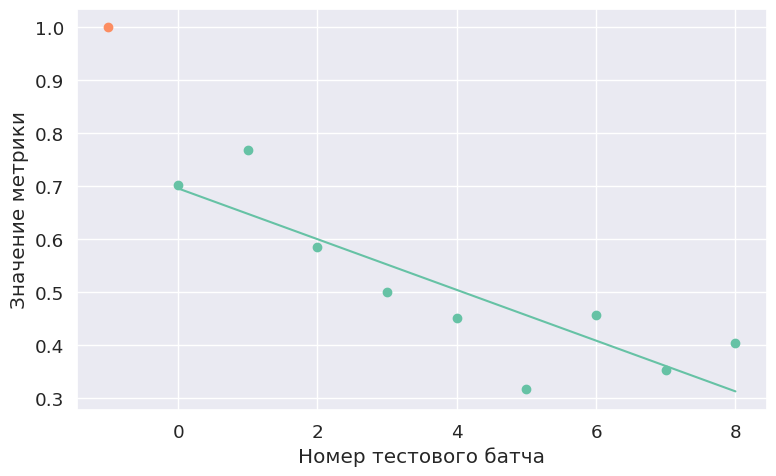

In [ ]:
model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)

scores = evaluate_accuracy_decay(
    model,
    X_train,
    y_train,
    [pd.DataFrame(batch) for batch in X_test],
    [batch for batch in y_test],
    metric=balanced_accuracy_score,
    visualize=True
)

print("Значения сбалансированной точности на обучающем и тестовых батчах:", scores)

**Вывод:** значение метрики небольшое и ухудшается с каждым батчем

Далее выполняйте тестирование только на первом тестовом батче.

#### 3.2 Логистическая регрессия с регуляризацией

За что отвечает гиперпараметр `C` у класса `LogisticRegression`?

**Ответ:** за силу регуляризации

Вам необходимо исследовать зависимость от `C` следующих величин:
1. Accuracy на трейне
2. Accuracy на тесте
3. Коэффициенты модели

Чтобы не приходилось постоянно обучать модели при одних и тех же сетках `C`, предлагается написать функцию, которая будет принимать на вход вид штрафа `penalty`, границы диапазона `C`, и саму выборку. На каждой итерации вычисляйте все величины и сохраняйте в виде списков. Для мониторинга времени работы используйте функцию `tqdm`. Пример использования:

```
from tqdm.notebook import tqdm
for C in tqdm(C_grid):
    <тело цикла>
```

Не забудьте также про имеющийся дисбаланс классов.

In [ ]:
def train_alpha_grid(
    min_log_C: float,
    max_log_C: float,
    resolution: int,
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    X_test: pd.DataFrame,
    y_test: np.ndarray,
    penalty: str,
    l1_ratio = None,
    solver: str = 'newton-cholesky',
    max_iter: int = 100
) -> Tuple[np.ndarray, List[List[float]], List[float], List[float]]:
    """Обучает модель LogisticRegression для разных значений параметра регуляризации C,
    сохраняет коэффициенты, вычисляет accuracy на обучающей и тестовой выборках.

    Args:
        min_log_C (float): минимальное значение log10(C) для сетки.
        max_log_C (float): максимальное значение log10(C) для сетки.
        resolution (int): число точек на сетке C.
        X_train (pd.DataFrame): обучающая выборка (признаки).
        y_train (np.ndarray): отклик на обучающей выборке.
        X_test (pd.DataFrame): тестовая выборка (признаки).
        y_test (np.ndarray): отклик на тестовой выборке.
        penalty (str): тип регуляризации ('l1', 'l2', 'elasticnet', 'none').
        solver (str, optional): метод оптимизации параметров модели. По-умолчанию 'newton-cholesky'.
        max_iter (int, optional): максимальное количество итераций для оптимизации. По-умолчанию 100.

    Returns:
        Tuple[np.ndarray, List[List[float]], List[float], List[float]]:
            - C_grid (np.ndarray): сетка значений C,
            - coefs_list (List[List[float]]): список коэффициентов для каждого значения C,
            - baccuracy_train_list (List[float]): список balanced accuracy на обучающей выборке для каждого значения C,
            - baccuracy_test_list (List[float]): список balanced accuracy на тестовой выборке для каждого значения C.
    """

    C_grid = np.logspace(min_log_C, max_log_C, resolution)

    # Инициализируем списки для сохранения результатов
    coefs_list = []
    baccuracy_train_list = []
    baccuracy_test_list = []

    # Обучаем модель для каждого значения C
    for C in tqdm(C_grid, desc="Обучение моделей"):
        model = LogisticRegression(
            penalty=penalty,
            C=C,
            solver=solver,
            max_iter=max_iter,
            l1_ratio=l1_ratio,  # Параметр для ElasticNet
            class_weight='balanced'  # Учитываем дисбаланс классов
        )

        # Обучаем модель
        model.fit(X_train, y_train)

        # Сохраняем коэффициенты модели
        coefs_list.append(model.coef_.flatten().tolist())

        # Вычисляем balanced accuracy на обучающей выборке
        y_train_pred = model.predict(X_train)
        baccuracy_train = balanced_accuracy_score(y_train, y_train_pred)
        baccuracy_train_list.append(baccuracy_train)

        # Вычисляем balanced accuracy на тестовой выборке
        y_test_pred = model.predict(X_test)
        baccuracy_test = balanced_accuracy_score(y_test, y_test_pred)
        baccuracy_test_list.append(baccuracy_test)

    return C_grid, coefs_list, baccuracy_train_list, baccuracy_test_list

Проведите эксперимент для 3-х разных моделей логистической регрессии с различными типами регуляризации:
1.  $L_1$-регуляризация
2.  $L_2$-регуляризация
3.  Комбинированная регуляризация с параметром `l1_ratio=0.5`.

>*Рекомендации*
>*   Подберите диапазоны значений для гиперпараметра `C`. Не берите слишком узкие, чтобы видеть на графике всю картину. Для слишком широких границ придётся брать больше точек.
>*   Вам не нужна очень частая сетка гиперпараметра `C`. При отладке кода можно вообще использовать сетку из 2-3 значений.
>*   Вы можете столкнуться с различными ошибками и `warning`-ами (например, неверный `solver`, отсутствие сходимости,  и т.д.) Постарайтесь настроить гиперпараметры модели таким образом, чтобы ошибки исчезли, а количество предупреждений было минимальным.
>*  Для ускорения работы программы можно использовать параллельные вычисления, передав аргумент `n_jobs` в модель. Это особенно полезно при запуске на локальном компьютере, так как Google Colab предоставляет лишь два ядра ЦПУ по-умолчанию.

In [ ]:
min_log_C = -6
max_log_C = 3
resolution = 10

C_grid_l1, coefs_l1, bacc_train_l1, bacc_test_l1 = train_alpha_grid(
    min_log_C=min_log_C,
    max_log_C=max_log_C,
    resolution=resolution,
    X_train=pd.DataFrame(X_train),
    y_train=y_train,
    X_test=X_test[0],
    y_test=y_test[0],
    penalty='l1',
    solver='liblinear',
    max_iter=4000
)

C_grid_l2, coefs_l2, bacc_train_l2, bacc_test_l2 = train_alpha_grid(
    min_log_C=min_log_C,
    max_log_C=max_log_C,
    resolution=resolution,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test[0],
    y_test=y_test[0],
    penalty='l2',
    solver='lbfgs',
    max_iter=4000
)

C_grid_en, coefs_en, bacc_train_en, bacc_test_en = train_alpha_grid(
    min_log_C=min_log_C,
    max_log_C=max_log_C,
    resolution=resolution,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test[0],
    y_test=y_test[0],
    penalty='elasticnet',
    l1_ratio=0.5,
    solver='saga',
    max_iter=4000
)



Обучение моделей:   0%|          | 0/10 [00:00<?, ?it/s]

Обучение моделей:   0%|          | 0/10 [00:00<?, ?it/s]

Обучение моделей:   0%|          | 0/10 [00:00<?, ?it/s]

Нарисуйте треки коэффициентов моделей в зависимости от `C`. Легенду можно сделать общую, если все графики помещаются на экране. Отразите в ней наименования признаков для соответствующих коэффициентов. Сделать красиво могут помочь заметки [отсюда](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot).

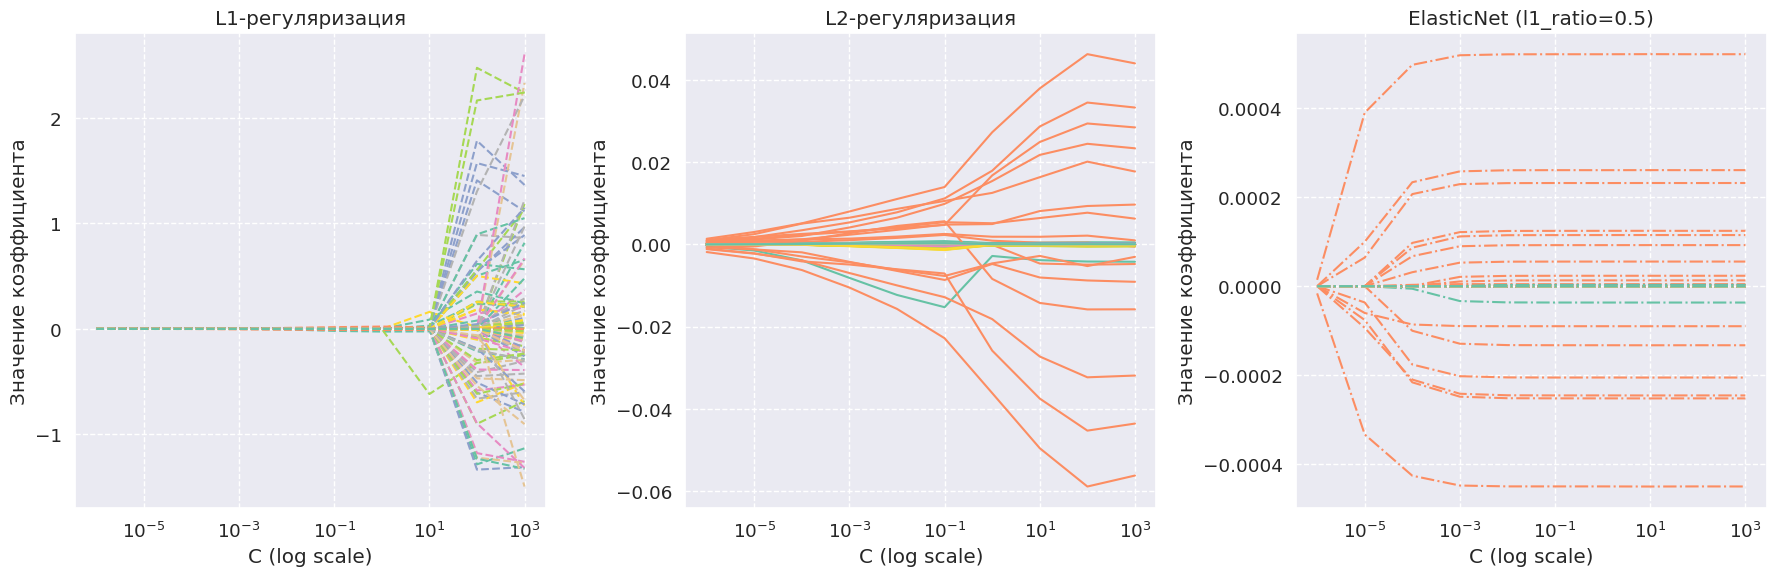

In [ ]:
coefs_l1 = np.array(coefs_l1)
coefs_l2 = np.array(coefs_l2)
coefs_en = np.array(coefs_en)
C_grid = np.logspace(-6, 3, 10)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# L1-регуляризация
for i in range(coefs_l1.shape[1]):
    axes[0].semilogx(C_grid, coefs_l1[:, i], linestyle='--')
axes[0].set_xlabel('C (log scale)')
axes[0].set_ylabel('Значение коэффициента')
axes[0].set_title('L1-регуляризация')
axes[0].grid(True, which="both", ls="--")

# L2-регуляризация
for i in range(coefs_l2.shape[1]):
    axes[1].semilogx(C_grid, coefs_l2[:, i], linestyle='-')
axes[1].set_xlabel('C (log scale)')
axes[1].set_ylabel('Значение коэффициента')
axes[1].set_title('L2-регуляризация')
axes[1].grid(True, which="both", ls="--")

# ElasticNet
for i in range(coefs_en.shape[1]):
    axes[2].semilogx(C_grid, coefs_en[:, i], linestyle='-.')
axes[2].set_xlabel('C (log scale)')
axes[2].set_ylabel('Значение коэффициента')
axes[2].set_title('ElasticNet (l1_ratio=0.5)')
axes[2].grid(True, which="both", ls="--")

# Улучшаем расположение элементов
plt.tight_layout()
plt.show()

**Вывод:** l1 - регуляризация сильнее зануляет малые коэффициенты, из-за чего возникает большая разница меежду максимальными и минимальными значениями кэфов, эластик при любых C работает эффективно, в то время, как l2 регуляризация ведет себя как и l1 в зависимости от коэффициентов.

Нарисуйте зависимости точности предсказания от `C` на обучающей и тестовой выборках. Скомпонуйте всё на 2-3 графиках. Горизонтальными линиями, отметьте точность модели без регуляризации на трейне и тесте.

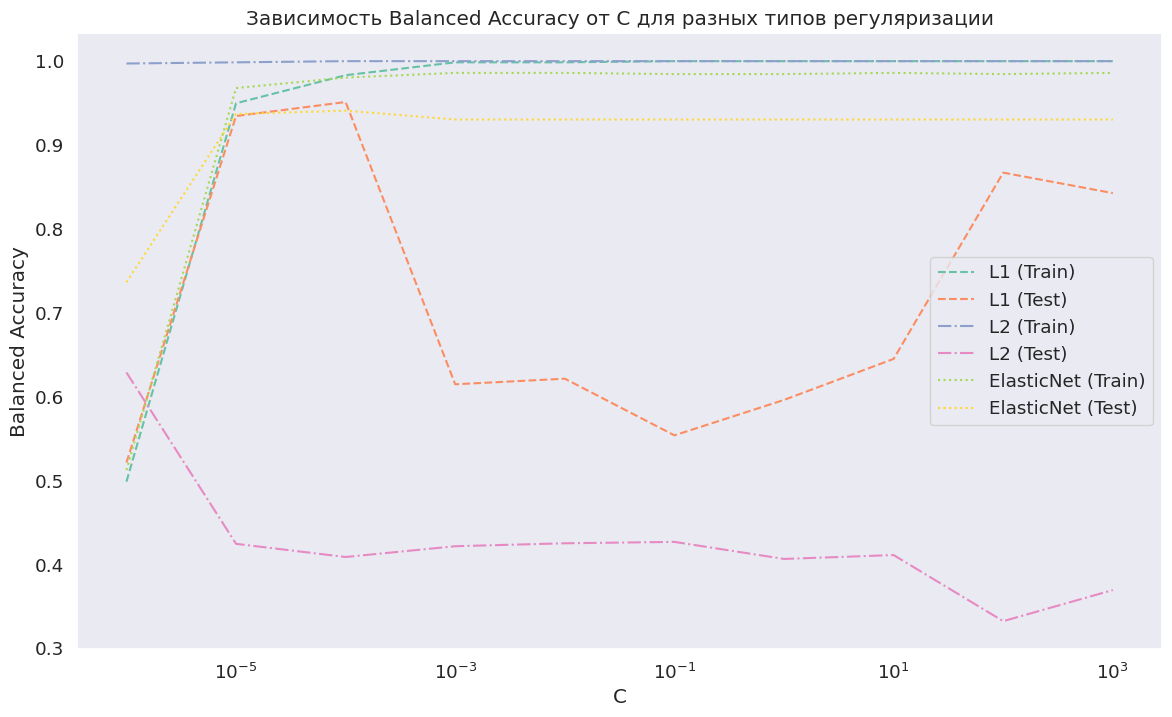

In [ ]:
plt.figure(figsize=(14, 8))

plt.semilogx(C_grid_l1, bacc_train_l1, label='L1 (Train)', linestyle='--')
plt.semilogx(C_grid_l1, bacc_test_l1, label='L1 (Test)', linestyle='--')
plt.semilogx(C_grid_l2, bacc_train_l2, label='L2 (Train)', linestyle='-.')
plt.semilogx(C_grid_l2, bacc_test_l2, label='L2 (Test)', linestyle='-.')
plt.semilogx(C_grid_en, bacc_train_en, label='ElasticNet (Train)', linestyle=':')
plt.semilogx(C_grid_en, bacc_test_en, label='ElasticNet (Test)', linestyle=':')

plt.xlabel('C')
plt.ylabel('Balanced Accuracy')
plt.title('Зависимость Balanced Accuracy от C для разных типов регуляризации')
plt.grid()
plt.legend()
plt.show()

**Вывод:** l2 регуляризация сильно переобучилась при всех коэффициентах, elasticnet хорошо справилась с заданием при всех C, l1 оказалась более чувствительной к коэффициенту и лучше работала при значениях порядка $C =10^{-4}$

Установите гиперпараметры логистической регрессии, при которой достиглось оптимальное качество. Визуализируйте точность её работы в зависимости от номера батча. Сравните с моделью без регуляризации. Сделайте выводы.

> 📌 *Замечание.* Имейте в виду, что точность на обучающей выборке должна оставаться близкой к 1. Это несколько противоречит классическому подходу, когда для борьбы с переобучением стараются одновременно улучшать метрику на тесте и ухудшать на трейне. В нашем случае следует предполагать (и надеяться), что система электронного носа спроектирована правильно, и газы хорошо отделяются друг от друга, пока датчики ещё "свежие". В таком случае три кита хорошей модели это:
> 1.  Точность на трейне близка к 1
> 2.  Высокая точность на первых тестовых батчах
> 3.  Слабый спад точности с течением времени.

Значения сбалансированной точности на обучающем и тестовых батчах: [0.9859937402190924, 0.9304313459801264, 0.795361987142809, 0.7567654639175257, 0.4881656804733728, 0.49860022396416576, 0.49468714455333546, 0.46325757575757576, 0.402200488997555, 0.4816666666666667]


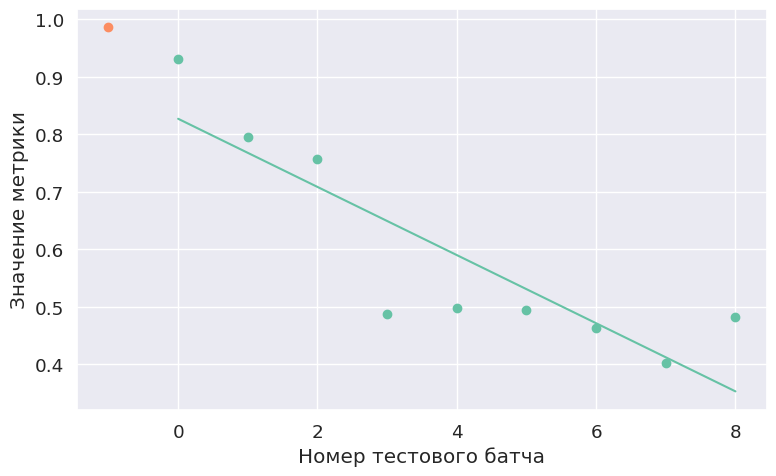

In [ ]:
model = LogisticRegression(
            penalty='elasticnet',
            C=0.0005,
            solver='saga',
            max_iter=4000,
            l1_ratio=0.5,
            class_weight='balanced'
)

scores = evaluate_accuracy_decay(
    model,
    X_train,
    y_train,
    [pd.DataFrame(batch) for batch in X_test],
    [batch for batch in y_test],
    metric=balanced_accuracy_score,
    visualize=True
)

print("Значения сбалансированной точности на обучающем и тестовых батчах:", scores)


Значения сбалансированной точности на обучающем и тестовых батчах: [1.0, 0.3426151761517615, 0.5888032490772217, 0.44571520618556704, 0.13313609467455623, 0.1522956326987682, 0.24021592442645073, 0.47765151515151516, 0.2530562347188264, 0.3591666666666667]


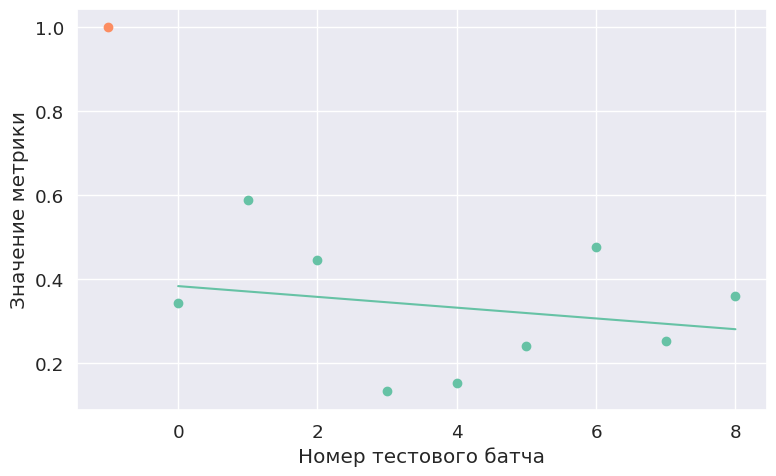

In [ ]:
model = LogisticRegression(
            penalty=None,
            solver='lbfgs',
            max_iter=4000,
            class_weight='balanced'
)

scores = evaluate_accuracy_decay(
    model,
    X_train,
    y_train,
    [pd.DataFrame(batch) for batch in X_test],
    [batch for batch in y_test],
    metric=balanced_accuracy_score,
    visualize=True
)

print("Значения сбалансированной точности на обучающем и тестовых батчах:", scores)

Сделайте общий вывод по задаче. Есть ли пользва от регуляризации с точки зрения метрики? Получается ли удовлетворить всем трём перечисленным условиям одновременно?

> 📌 *Замечание.* Учитывайте, что мы свели задачу классификации 6 газов к бинарному случаю. Поэтому результаты могут сильно различаться при разных разбиениях. Это вполне логично: дрейф сенсоров крайне плохо предсказуем, и не обязан одинаково влиять на способность системы различать разные газы.

**Вывод:** Регуляризация помогла, но желаемого результата все еще нет. Высокая точность на трейне и первых батчах была достигнута, однако при последующих батчах результат сильно ухудшался и модель становилась бесполезной

## Задача 3 (продолжение)

Продолжаем работать с этим датасетом.

### 1.  Число обусловленности
Исследуйте зависимость числа обусловленности от параметра `C` для $L_1$-регуляризации. Постройте соответствующий график.

**Вывод:**

### 2. Предсказание вероятностей

Исследуйте распределение предсказываемых вероятностей для логистической регерессии с регуляризацией и без.

Для начала, реализуйте функцию, которая будет обучать логистическую регрессию с наиболее оптимальным `C` и возвращать предсказание вероятности для касса $0$. Для этого у всех классификаторов `sklearn` предусмотрен метод `predict_proba`.

In [ ]:
def get_proba_distr(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    X_test: pd.DataFrame,
    C: float = np.inf
) -> Tuple[np.ndarray, float]:

    <...>

SyntaxError: invalid syntax (<ipython-input-25-6d2c4beb504f>, line 8)

Сравните гистограммы распределения предсказанных вероятностей для двух указанных моделей. Используйте первый тестовый батч.

**Вывод:**

Постройте аналогичные гистограммы для ещё двух тетовых батчей. Сделайте выводы. Меняет ли регуляризация распределение вероятностей?

**Вывод:**